In [1]:
# Make sure you `python -m pip install scikit-lego`
from sklego.datasets import load_penguins
from hulearn.experimental.interactive import InteractiveCharts

In [22]:
import pandas as pd
import numpy as np

In [10]:
df = load_penguins(as_frame = True).dropna()

In [12]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


In [13]:
X, y = df.drop(columns=['species']), df['species']

In [3]:
clf = InteractiveCharts(df, labels="species")

Loading BokehJS ...

In [4]:
# Run this in a seperate cell.
clf.add_chart(x="bill_length_mm", y="bill_depth_mm")

In [5]:
# Run this in a seperate cell.
clf.add_chart(x="flipper_length_mm", y="body_mass_g")

In [16]:
# clf.data()

In [14]:
from hulearn.classification import InteractiveClassifier

model = InteractiveClassifier(json_desc=clf.data())

# The `.fit(X, y)` is a formality form scikit-learn.
# It isn't "learning" anything when you run that code.
preds = model.fit(X, y).predict_proba(X)

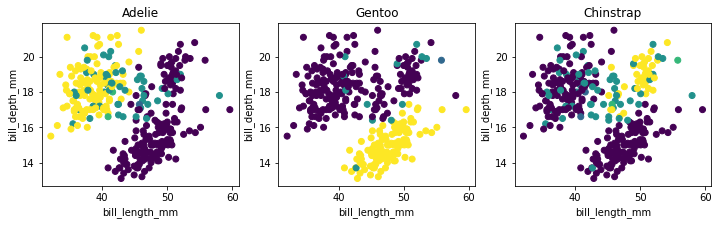

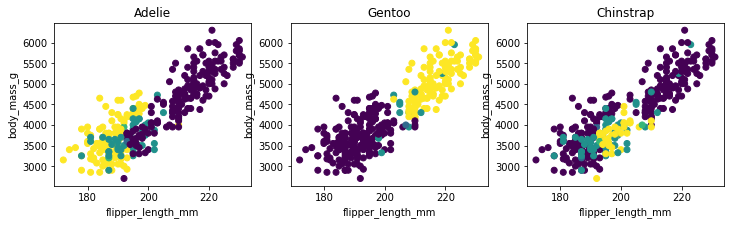

In [18]:
import matplotlib.pylab as plt

plt.figure(figsize=(12, 3))
for i in range(3):
    plt.subplot(131 + i)
    plt.scatter(X['bill_length_mm'], X['bill_depth_mm'], c=preds[:, i])
    plt.xlabel('bill_length_mm')
    plt.ylabel('bill_depth_mm')
    plt.title(model.classes_[i])

import matplotlib.pylab as plt

plt.figure(figsize=(12, 3))
for i in range(3):
    plt.subplot(131 + i)
    plt.scatter(X['flipper_length_mm'], X['body_mass_g'], c=preds[:, i])
    plt.xlabel('flipper_length_mm')
    plt.ylabel('body_mass_g')
    plt.title(model.classes_[i])

In [26]:
old_example = pd.DataFrame([{
    'island': 'Torgersen',
    'bill_length_mm': 39.1,
    'bill_depth_mm': 18.7,
    'flipper_length_mm': 220.0,
    'body_mass_g': 5750.0,
    'sex': 'male'}
])

new_example = pd.DataFrame([{
    'island': 'Torgersen',
    'bill_length_mm': np.nan,
    'bill_depth_mm': 18.7,
    'flipper_length_mm': 220.0,
    'body_mass_g': 5750.0,
    'sex': 'male'}
])

model.predict(new_example)

array(['Gentoo'], dtype='<U6')

In [27]:
model.predict_proba(new_example)

array([[9.97008973e-04, 9.98005982e-01, 9.97008973e-04]])

In [29]:
from hulearn.outlier import InteractiveOutlierDetector

# Load the model using drawn-data.
model = InteractiveOutlierDetector(json_desc=clf.data())

X, y = df.drop(columns=['species']), df['species']
preds = model.fit(X, y).predict(X)

Text(0, 0.5, 'bill_depth_mm')

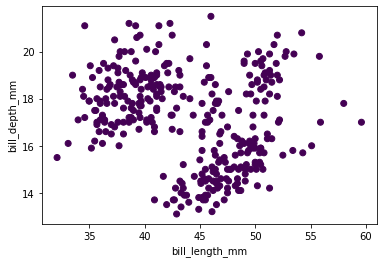

In [30]:
plt.scatter(X['bill_length_mm'], X['bill_depth_mm'], c=preds)
plt.xlabel('bill_length_mm')
plt.ylabel('bill_depth_mm')